## Nama : Nanda Harsana Octavya
## NIM : 09011381722142
## Identifikasi Species bunga Iris menggunakan Artifical Neural Network

Identifikasi Species bunga iris dapat dilakukan dengan menggunakan Artificial Neural Network (ANN). ANN dibuat menyerupai sistem syaraf manusia, disebut juga Jaringan Syaraf Tiruan (JST). Data iris merupakan data dari 150 bunga  yang diidentifikasi berdasarkan panjang  mahkota, lebar mahkota, panjang kelopak dan lebar kelopak, Dataset dari bunga Iris dapat mengidentifikasi setiap spesies bunga Iris tersebut, Species bunga iris terdiri dari iris versicolor, iris virginica dan iris sentosa. Dengan demikian Identifikasi Species bunga Iris dapat dilakukan secara lebih mudah dengan menggunakan Artificial Neural Network (ANN)

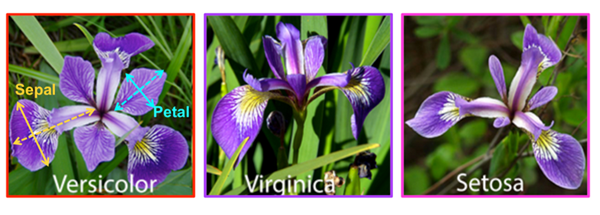

### Importing the libraries

1. Library Numpy berfungsi untuk mengolah data dalam bentuk angka (array)
2. Library Matplotlib berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
3. Library Pandas Berfungsi untuk membaca file dataset dalam bentuk .CSV
4. Library Seaborn sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi datase
5. Library plotly.graph berfungsi untuk membuat grafis
6. Library Sklearn digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf



In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import normalize


init_notebook_mode(connected=True)

C:\Users\asus-pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Importing the dataset

In [2]:
dataset = pd.read_csv('datairis.csv', delimiter=',', dtype=float)

### Mengecek data kosong

In [3]:
dataset.isnull().any().sum()

0

dataset yang digunakan tidak ada data yang kosong

### Dataset yang digunakan dalam penelitian
Dataset yang digunakan diambil dari kaggle. Data dari dataset yang digunakan terdiri dari 150 bunga Iris dengan masing-masing kelas/species Iris Setosa, Iris Versicolour, dan Iris Virginica.




Dibawah ini adalah tampilan dataset yang digunakan dalam penelitian ini

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,0.0
1,2.0,4.9,3.0,1.4,0.2,0.0
2,3.0,4.7,3.2,1.3,0.2,0.0
3,4.0,4.6,3.1,1.5,0.2,0.0
4,5.0,5.0,3.6,1.4,0.2,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null float64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null float64
dtypes: float64(6)
memory usage: 7.2 KB


Terdapat infomasi atau isi dari dataset yang digunakan yaitu dataset berjumlah 150 buah rangenya dari 0 sampai 149, data berjumlah 6 kolom terdiri dari id, SepalLenghtCm, SepalWidthCm, PetalLenghtCm, PetalWidthCm dan Species. dataset yang digunakan bertipe float64(6) serta besar memory yang digunakan adalah 7.2 KB 

#####  Pengertian setiap kolom pada dataset
1. id adalah nomor setiap kolom

2. SepalLenghtCm adalah Panjang helai kelopak bunga (Cm)

3. SepalWidhtCm adalah Lebar helai kelopak bunga (Cm)

4. PetalLenghtCm adalah Panjang helai mahkota bunga (Cm)

5. PetalWidthCm adalah Lebar helai mahkota bunga (Cm)

6. Species adalah jenis spesies dari bunga iris terdiri dari 0 = Iris-Sentosa, 1= Iris-VersiColour dan 2=Iris-Virginica

In [6]:
dataset.shape

(150, 6)

Dataset yang digunakan terdiri dari 150 baris dan 6 kolom

In [7]:
dataset.Species.value_counts()

2.0    50
1.0    50
0.0    50
Name: Species, dtype: int64

Pada Species data 2 berjumlah 50 buah, data 1 berjumlah 50 buah dan data 0 berjumlah 50 buah

In [8]:
Iris_Sentosa= len(dataset[dataset.Species == 0])
Iris_VersiColour = len(dataset[dataset.Species == 1])
Iris_Virginica = len(dataset[dataset.Species == 2])
print("Persentase jumlah Iris_Sentosa : {:.2f}%".format((Iris_Sentosa / (len(dataset.Species))*100)))
print("Persentase jumlah Iris_VersiColour : {:.2f}%".format((Iris_VersiColour / (len(dataset.Species))*100)))
print("Persentase jumlah Iris_Virginica : {:.2f}%".format((Iris_Virginica / (len(dataset.Species))*100)))

Persentase jumlah Iris_Sentosa : 33.33%
Persentase jumlah Iris_VersiColour : 33.33%
Persentase jumlah Iris_Virginica : 33.33%


Presentasi dari masing-masing dari jumlah spesies iris adalah 33.33% dengan ini dapat dikatakan bahwa dataset yang digunakan adalah balanced

### Visualisasi Data

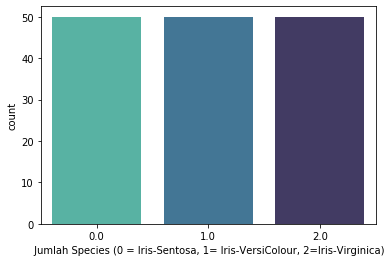

In [9]:
sns.countplot(x='Species', data=dataset, palette="mako_r")
plt.xlabel(" Jumlah Species (0 = Iris-Sentosa, 1= Iris-VersiColour, 2=Iris-Virginica)")
plt.show()

Pada hasil lebel diatas dapat dilihat bahwa spesies 0 = Iris-Sentosa, 1= Iris-VersiColour dan 2=Iris-Virginic banyak datanya sama-sama 50 buah

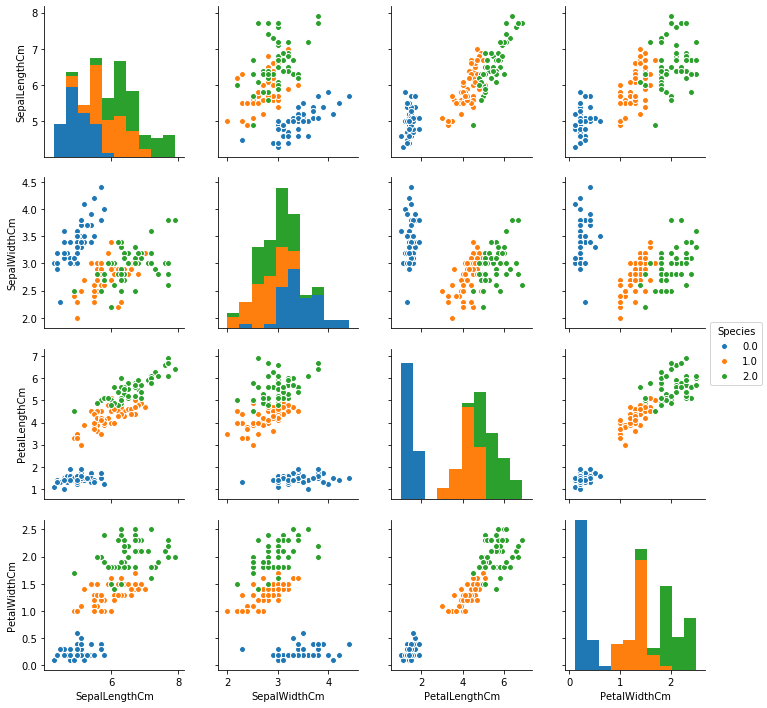

In [10]:
sns.pairplot( data=dataset, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

kodingan diatas berfungsi untuk memvisualisasikan distribusi bivariat untuk setiap kombinasi (n,2) pada masing - masing peubah.  fungsi pairplot() ini dapat menggambarkan grafik kombinasi (n,2) dari setiap peubah data dalam bentuk matriks, dengan
diagonal utamanya merupakan representasi grafis dari data univariat. Melalui diagram diatas kita dapat menganalisis perubahan hubungan bivariat pada masing - masing peubah dari dataset bunga iris.

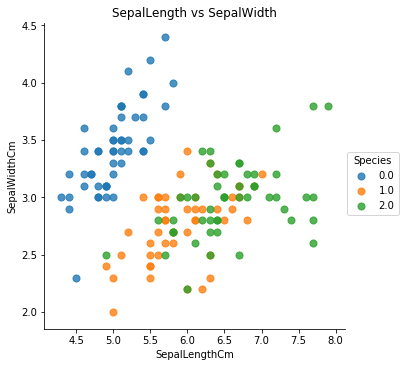

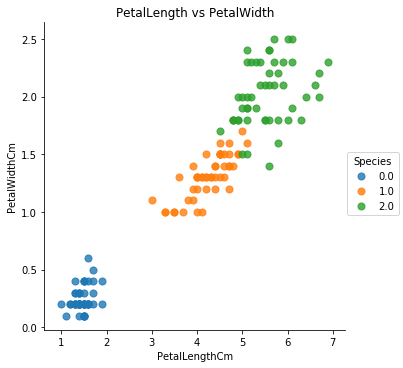

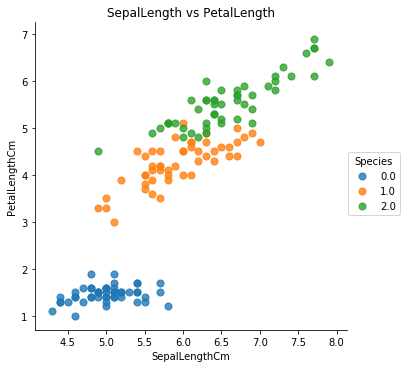

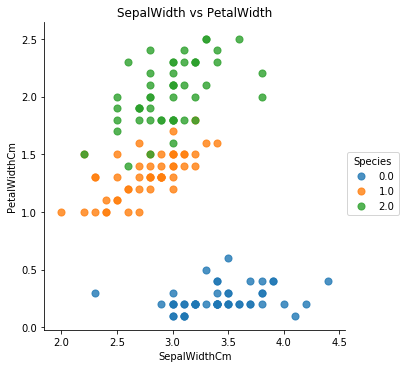

In [11]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=dataset,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=dataset,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=dataset,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=dataset,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

Grafis diatas adalah perbandingan antara data SepalLength vs SepalWidth, PetalLength vs PetalWidth, SepalLength vs PetalLength dan SepalWidth vs PetalWidth

### Data Preparation

In [12]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

X adalah data yang dikelola untuk testing dan training, yaitu data dari kolom 1 sampai data sebelum kolom terakhir. 

Terdiri dari label :
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm

Y adalah data untuk output yaitu data kolom terakhir (Species)

### Feature Scaling

In [13]:
# create scaler
scaler = MinMaxScaler()
ai = scaler.fit(X)
aa = scaler.fit_transform(X)

Feature Scaling berfungsi agar numerical data pada dataset memiliki rentang nilai (scale) yang sama dan MinMaxScaler digunakan untuk menormalkan data pada dataset yang digunakan



In [14]:
from keras.utils.np_utils import to_categorical

Y_categorical = to_categorical(Y)
Y_categorical.shape

(150, 3)

### Splitting the data set to Training and Test


In [15]:
training_data, testing_data, training_label, testing_label = train_test_split(aa, Y_categorical, test_size=0.2, shuffle=True, stratify=Y)

Langkah berikutnya adalah membagi data menjadi dua kelompok, kelompok training dan kelompok testing. Data yang berada pada kelompok training adalah data yang akan digunakan untuk melatih sistem machine learning sedangkan data pada kelompok testing adalah data yang akan menguji sistem machine learning tersebut. dengan persentase 80% untuk data training, 20% untuk data testing

### Model


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(32, input_dim = 4, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

model yang digunakan pada penelitian ini adalah Sequental

1. hiden layer **pertama** sebesar 32 dengan input dim sebanyak 4 menggunakan activation relu
2. hiden layer **kedua** sebesar 64 menggunakan activation relu
3. iden layer **ketiga** sebesar 128 menggunakan activation relu 
4. hiden layer **keempat** sebesar 64 menggunakan activation relu
5. hiden layer **kelima** sebesar 32 menggunakan activation relu 
6. Droput digunakan untuk mensimulasikan sejumlah besar arsitektur jaringan yang berbeda dengan menurunkan node secara acak selama data di training sebesar 40%
7. hiden layer **keenam** sebesar 16 menggunakan activation relu 
8. Output 1 layer menggunakan 3 unit Neural Network dengan menggunakan activation softmax (karena data sudah diubah menjadi categorical, jika tidak maka gunakan activation sigmoid)

### Compile Data
Menggunakan categorical_crossentropy, dan metric Akurasi sebagai parameternya

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### FIT

Proses training model. Disini akan dilakukan training model, dimana JST akan melakukan learning berdasarkan data latih yaitu **aa** (feature) dan **Y_categotical** (target). Disini juga dilakukan validasi dengan data uji, ditampung pada variabel **testing_data** (feature) dan **testing_label** (target). Guna dilakukan fit adalah agar setiap epochnya dapat ditampung dalam variabel **history**, sehingga bisa diplot perubahannya.

In [18]:
history=model.fit(aa, Y_categorical, validation_data=(testing_data, testing_label), epochs=100, batch_size=64,verbose=1)

Train on 150 samples, validate on 30 samples
Epoch 1/100
150/150 [==============================] - 4s 29ms/step - loss: 1.1013 - accuracy: 0.3200 - val_loss: 1.0795 - val_accuracy: 0.6333
Epoch 2/100
150/150 [==============================] - 0s 307us/step - loss: 1.0805 - accuracy: 0.5000 - val_loss: 1.0612 - val_accuracy: 0.6667
Epoch 3/100
150/150 [==============================] - 0s 307us/step - loss: 1.0673 - accuracy: 0.6133 - val_loss: 1.0380 - val_accuracy: 0.6667
Epoch 4/100
150/150 [==============================] - 0s 393us/step - loss: 1.0390 - accuracy: 0.6200 - val_loss: 1.0067 - val_accuracy: 0.6667
Epoch 5/100
150/150 [==============================] - ETA: 0s - loss: 0.9965 - accuracy: 0.73 - 0s 400us/step - loss: 1.0094 - accuracy: 0.6800 - val_loss: 0.9706 - val_accuracy: 0.6667
Epoch 6/100
150/150 [==============================] - 0s 293us/step - loss: 0.9685 - accuracy: 0.7267 - val_loss: 0.9249 - val_accuracy: 0.6667
Epoch 7/100
150/150 [=======================

150/150 [==============================] - 0s 373us/step - loss: 0.1369 - accuracy: 0.9600 - val_loss: 0.1523 - val_accuracy: 0.9333
Epoch 57/100
150/150 [==============================] - 0s 467us/step - loss: 0.1444 - accuracy: 0.9333 - val_loss: 0.1074 - val_accuracy: 0.9333
Epoch 58/100
150/150 [==============================] - 0s 787us/step - loss: 0.1215 - accuracy: 0.9400 - val_loss: 0.0917 - val_accuracy: 0.9667
Epoch 59/100
150/150 [==============================] - 0s 380us/step - loss: 0.1392 - accuracy: 0.9667 - val_loss: 0.1035 - val_accuracy: 0.9333
Epoch 60/100
150/150 [==============================] - 0s 280us/step - loss: 0.0997 - accuracy: 0.9533 - val_loss: 0.1482 - val_accuracy: 0.9333
Epoch 61/100
150/150 [==============================] - 0s 460us/step - loss: 0.0988 - accuracy: 0.9667 - val_loss: 0.1097 - val_accuracy: 0.9333
Epoch 62/100
150/150 [==============================] - 0s 367us/step - loss: 0.1005 - accuracy: 0.9800 - val_loss: 0.1012 - val_accuracy

### Akurasi

In [19]:
scores = model.evaluate(aa, Y_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

150/150 [==============================] - 0s 180us/step

accuracy: 98.00%


In [20]:
history.history

{'accuracy': [0.32,
  0.5,
  0.61333334,
  0.62,
  0.68,
  0.7266667,
  0.66,
  0.73333335,
  0.68666667,
  0.6333333,
  0.6333333,
  0.74,
  0.72,
  0.64666665,
  0.74,
  0.8,
  0.78,
  0.8066667,
  0.8466667,
  0.8666667,
  0.88666666,
  0.8666667,
  0.8933333,
  0.9066667,
  0.8466667,
  0.88666666,
  0.8933333,
  0.91333336,
  0.94,
  0.91333336,
  0.94666666,
  0.9266667,
  0.9066667,
  0.93333334,
  0.93333334,
  0.94,
  0.91333336,
  0.94,
  0.9266667,
  0.9533333,
  0.91333336,
  0.91333336,
  0.91333336,
  0.9533333,
  0.91333336,
  0.94,
  0.96666664,
  0.9533333,
  0.9533333,
  0.93333334,
  0.94666666,
  0.93333334,
  0.93333334,
  0.9533333,
  0.96,
  0.96,
  0.93333334,
  0.94,
  0.96666664,
  0.9533333,
  0.96666664,
  0.98,
  0.96,
  0.96,
  0.9533333,
  0.9533333,
  0.9266667,
  0.96,
  0.9533333,
  0.94666666,
  0.94666666,
  0.96666664,
  0.96666664,
  0.93333334,
  0.96,
  0.96666664,
  0.96666664,
  0.94666666,
  0.97333336,
  0.9266667,
  0.96666664,
  0.9533333,


### Plotting Model Akurasi dan Loss Akurasi

Evaluasi akurasi model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

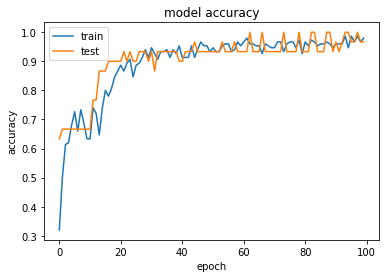

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluasi loss/error model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

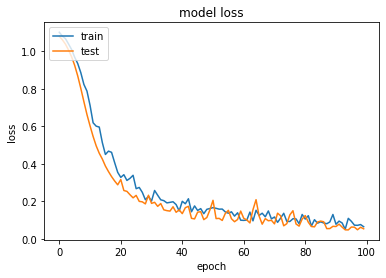

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confussion Matrix

Penggunaan  Confussion Matrix untuk mengevaluasi kualitas output dari classifier pada dataset iris. Elemen-elemen diagonal mewakili jumlah titik di mana label yang diprediksi sama dengan label yang sebenarnya, sedangkan elemen off-diagonal adalah mereka yang salah diberi label oleh classifier. Semakin tinggi nilai diagonal dari  Confussion Matrix semakin baik, menunjukkan banyak prediksi yang benar,bentuk klasifikasi dari dataset yang digunakan adalah multi-class

In [23]:
train_pred = model.predict(aa)
test_pred = model.predict(testing_data)

untuk menggunakan confusion matrix yang dilakukan adalah membuat model train_pred dan test_pred yang berfungsi untuk melihat prediksi apasaja yang telah dibuat oleh model

In [24]:
train_pred.round()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [25]:
cm = confusion_mtx = confusion_matrix(Y_categorical.argmax(axis=1), train_pred.argmax(axis=1))

In [26]:
cm = confusion_mtx

Dibawah ini adalah hasil confusion matrix 

In [27]:
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

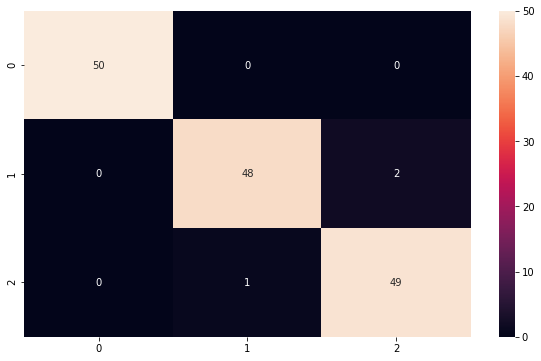

In [28]:
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True)

Berdasarkan hasil gambar diatas dapat dilihat bahwa:

1. jumlah data 0+0 sebanyak 50 data
2. jumlah data 0+1 sebanyak 0 data
3. jumlah data 0+2 sebanyak 0 data
4. jumlah data 1+0 sebanyak 0 data
5. jumlah data 1+1  sebanyak 48 data
6. jumlah data 1+2 sebanyak 2 data
7. jumlah data 2+0 sebanyak 0 data
8. jumlah data 2+1 sebanyak 1 data
9. jumlah data 2+2 sebanyak 49 data

yang dimana 0 = Iris-Sentosa, 1= Iris-VersiColour dan 2=Iris-Virginic.

tabel model matrix confusion multi-class 
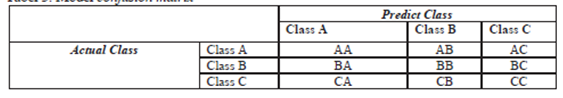


Confusion matrix adalah suatu metode yang digunakan untuk melakukan perhitungan akurasi. presisi adalah proposi kasus yang di prediksi positif yang juga positif benar pada data sebenarnya, recall adalah proposi kasus positif yang sebenarnya yg di prediksi positif secara benar

dibawah ini adalah rumus matrix confusion multi-class:

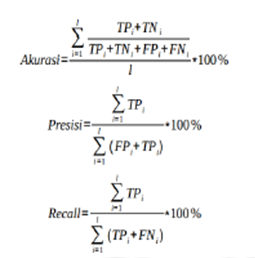

dimana:

    TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem untuk kelas ke i

    TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem untuk kelas ke i

    FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem untuk kelas ke i

    FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem untuk kelas ke i


In [31]:
Accuracy= (50+48+49)/(50+0+0+0+48+2+0+1+49)
Accuracy

0.98

perhitungan akurasi menggunakan matrix confusion multi-class secara manual adalah 98%

dibawah ini adalah hasil precision, recall, f1-score, support, accuracy, macro avg dan weighted avg pada penelitian ini

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_categorical.argmax(axis=1), train_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



**Referensi**

Paper : ANALISIS VARIASI PARAMETER BACKPROPAGATION ARTIFICIAL NEURAL NETWORK TERHADAP PENGENALAN POLA DATA IRIS

dataset : https://www.kaggle.com/arshid/iris-flower-dataset